In [1]:
# import urllib.request
import tarfile
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
def retrieve_web_data(url,data_path,filename):
    if len(url) == 0:
        return
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    urllib.request.urlretrieve(url,data_path+filename)
    target_file=tarfile.open(data_path+filename)
    target_file.extractall(data_path)
    return

In [18]:
root_url='https://raw.githubusercontent.com/ageron/handson-ml/master/'
path='datasets/housing'
filename='/housing.tgz'
retrieve_web_data(root_url+path+filename,path,filename)

In [3]:
import pandas as pd
def load_file(filename):
    return pd.read_csv(filename)

In [4]:
houses_df = load_file('../datasets/housing/housing.csv')

In [5]:
houses_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
houses_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

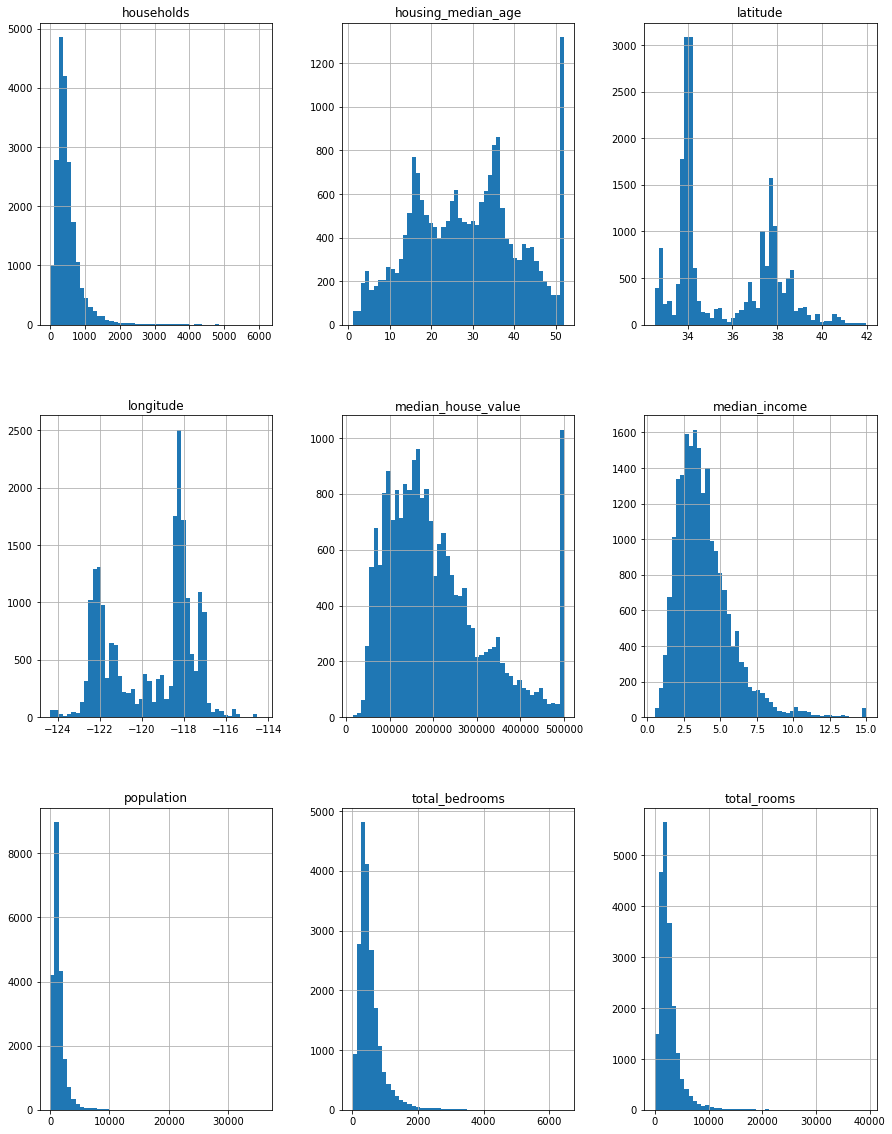

In [9]:
houses_df.hist(bins=50,figsize=(15,20))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(houses_df,test_size=.33,random_state=42)

In [12]:
import numpy as np
houses_df['incoming_cat']=np.ceil(houses_df['median_income']/1.5)
houses_df['incoming_cat'].where(houses_df['incoming_cat']<5,5.0,inplace=True)

In [13]:
houses_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incoming_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

In [15]:
sSplit=StratifiedShuffleSplit(1,test_size=.33,random_state=42)

In [16]:
for train_index, test_index in sSplit.split(houses_df,houses_df['incoming_cat']):
    train_set=houses_df.iloc[train_index]
    test_set = houses_df.iloc[test_index]

In [17]:
houses_df['incoming_cat'].value_counts()/len(houses_df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: incoming_cat, dtype: float64

In [18]:
random_sample=houses_df.sample(frac=.67,replace=False)

In [19]:
random_sample['incoming_cat'].value_counts()/len(random_sample)

3.0    0.352231
2.0    0.320703
4.0    0.174127
5.0    0.114831
1.0    0.038108
Name: incoming_cat, dtype: float64

In [20]:
train_set['incoming_cat'].value_counts()/len(train_set)-houses_df['incoming_cat'].value_counts()/len(houses_df)

3.0    1.160436e-05
2.0   -1.079150e-06
4.0    7.988510e-07
5.0   -3.243055e-05
1.0    2.110648e-05
Name: incoming_cat, dtype: float64

In [21]:
for s in (train_set,test_set):
    s.drop(['incoming_cat'],inplace=True,axis=1)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


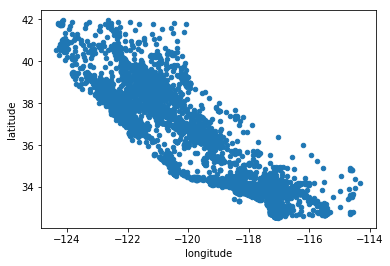

In [22]:
houses_df.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

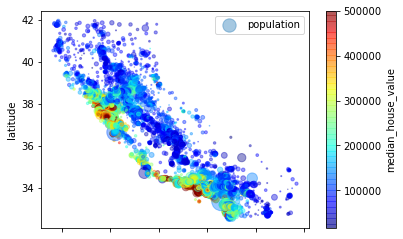

In [23]:
houses_df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=houses_df['population']/100,label="population",
              c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,)
plt.legend()

In [24]:
corr_matrix=houses_df.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
incoming_cat          0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ae89ad0>,
      dtype=object)

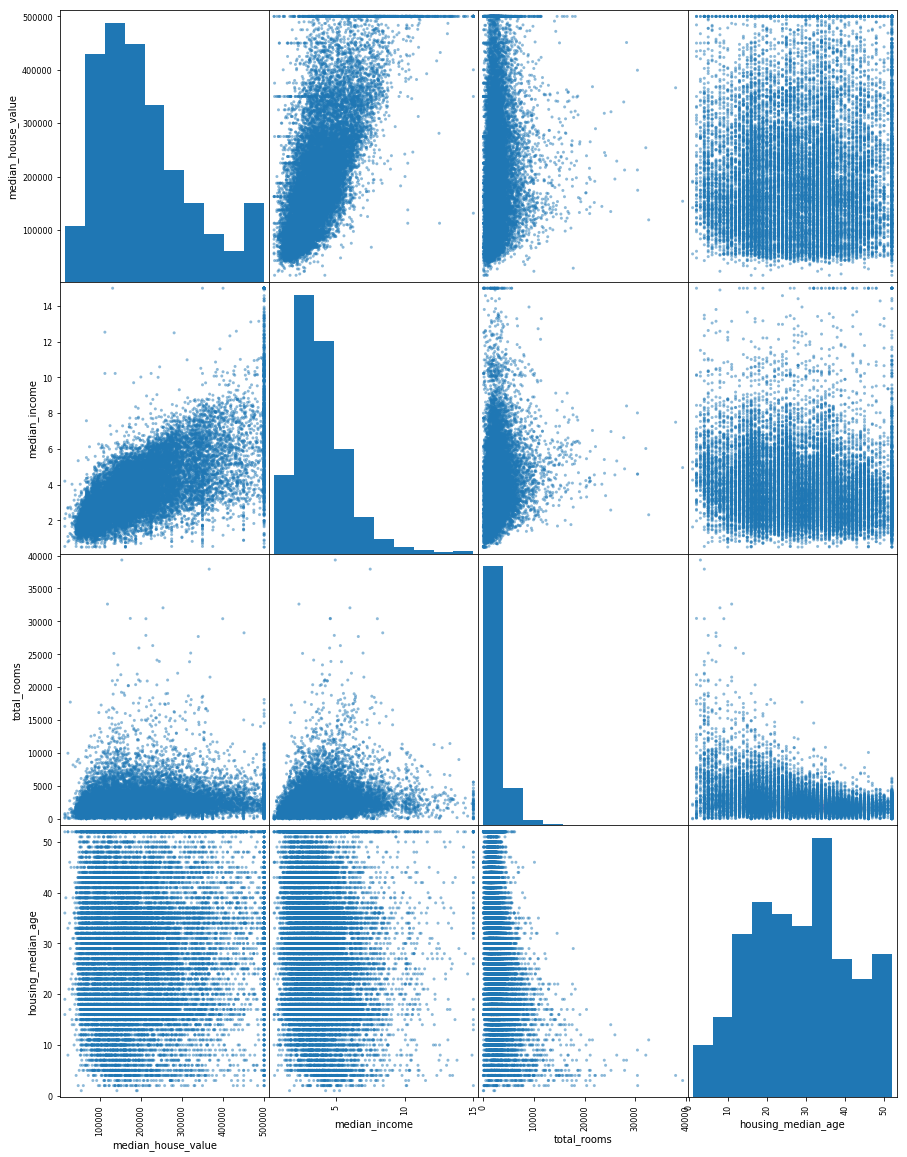

In [26]:
from pandas.tools.plotting import scatter_matrix
attributes=['median_house_value',"median_income","total_rooms","housing_median_age"]
scatter_matrix(houses_df[attributes],figsize=(15,20))


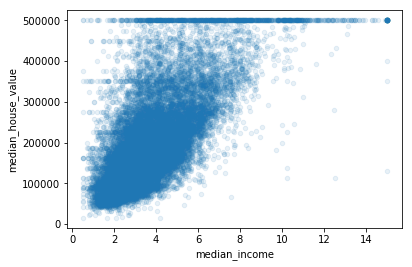

In [27]:
houses_df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [173]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameImputer(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        self.fill=pd.Series([ X[c].value_counts().sort_values(ascending=False).index[0] if X[c].dtype==np.dtype('O') else X[c].median() for c in X],index=X.columns)
        return self
    
    def transform(self,X,y=None):
        
        return X.fillna(self.fill)

In [174]:
houses_df_test=houses_df.copy()
houses_df_test['ocean_proximity'].iloc[:3]=np.nan
dfImputer=DataFrameImputer()
house_df_nafilled=dfImputer.fit_transform(houses_df_test)
house_df_nafilled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,incoming_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,<1H OCEAN,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,<1H OCEAN,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,<1H OCEAN,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [40]:
from sklearn.preprocessing import Imputer
iPuter = Imputer(strategy='median')
houses_df_num = houses_df.drop(['ocean_proximity'],axis=1)
X=iPuter.fit_transform(houses_df_num)
houses_df_num=pd.DataFrame(X,columns=houses_df_num.columns)
houses_df_num.head()

//anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,incoming_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0


In [33]:
print(houses_df_num.info())
print(iPuter.statistics_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20640 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
incoming_cat          20640 non-null float64
dtypes: float64(10)
memory usage: 1.6 MB
None
[-1.1849e+02  3.4260e+01  2.9000e+01  2.1270e+03  4.3500e+02  1.1660e+03
  4.0900e+02  3.5348e+00  1.7970e+05  3.0000e+00]


In [51]:
iPuter.statistics_
houses_df_num.median().values

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05,  3.0000e+00])

In [60]:
from sklearn.base import BaseEstimator, TransformerMixin
total_rooms,households,population,total_bedrooms=3,6,5,4
class CombineFeatureTransformer(BaseEstimator,TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X):
        return self
    def transform(self,X):
        print(type(X))
        rooms_per_households=X.iloc[:,total_rooms]/X.iloc[:,households]
        population_per_households=X.iloc[:,population]/X.iloc[:,households]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X.iloc[:,total_bedrooms]/X.iloc[:,total_rooms]
            return np.c_[X,rooms_per_households,population_per_households,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_households,population_per_households]

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pip = Pipeline([('DataFrameImputer',DataFrameImputer()),('feature_combine',CombineFeatureTransformer()),('standardization',StandardScaler())])

X=pip.fit_transform(houses_df.drop(['ocean_proximity','median_house_value'],axis=1))

<class 'pandas.core.frame.DataFrame'>


In [70]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X,y=None):
        return X[self.attribute_names]

In [109]:
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(houses_df_test.columns)
num_attribs.remove('incoming_cat')
num_attribs.remove('median_house_value')
num_attribs.remove('ocean_proximity')
cat_attribs = ["ocean_proximity"]
num_pip = Pipeline([('Selector',DataFrameSelector(num_attribs)),('DataFrameImputer',DataFrameImputer()),('Feature_combine',CombineFeatureTransformer()),('Standardization',StandardScaler())])
cat_pip=Pipeline([('Selector',DataFrameSelector(cat_attribs)),('DataFrameImputer',DataFrameImputer()),('Encoder',OneHotEncoder(sparse=False))])
from sklearn.pipeline import FeatureUnion

fU = FeatureUnion(transformer_list=[('num pip',num_pip),('cat pip',cat_pip)])
features=fU.fit_transform(houses_df_test)

<class 'pandas.core.frame.DataFrame'>


In [111]:
target=houses_df['median_house_value'].values

In [112]:
train_X,test_X,train_y,test_y=train_test_split(features,target,test_size=0.33)

In [113]:
from sklearn.linear_model import LinearRegression
linearR = LinearRegression()
linearR.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
predict_train_y=linearR.predict(train_X)

In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(np.sqrt(mean_squared_error(train_y,predict_train_y)))
print(mean_absolute_error(train_y,predict_train_y))

68619.86169278793
49481.837431298816


In [116]:
print(train_y[:5])
print(predict_train_y[:5])

[338900. 183700. 191100. 184600. 331900.]
[258112. 230272. 248896. 246720. 294592.]


In [117]:
from sklearn.tree import DecisionTreeRegressor

dtReg=DecisionTreeRegressor()
dtReg.fit(train_X,train_y)
predict_train_y_tree=dtReg.predict(train_X)

In [118]:
print(np.sqrt(mean_squared_error(train_y,predict_train_y_tree)))
print(mean_absolute_error(train_y,predict_train_y_tree))

0.0
0.0


In [119]:
predict_train_y_tree

array([338900., 183700., 191100., ..., 195200., 215600., 173900.])

In [120]:
predict_test_y_tree=dtReg.predict(test_X)
print(np.sqrt(mean_squared_error(test_y,predict_test_y_tree)))
print(mean_absolute_error(test_y,predict_test_y_tree))

71024.20636325299
45616.687903699356


In [121]:
predict_test_y_linear=linearR.predict(test_X)
print(np.sqrt(mean_squared_error(test_y,predict_test_y_linear)))
print(mean_absolute_error(test_y,predict_test_y_linear))

67813.45018037764
49322.70361127422


In [122]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtReg,train_X,train_y,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-score)

In [123]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Std:",scores.std())

display_scores(rmse_score)

('Scores:', array([69013.48656105, 67613.31656486, 75715.06180314, 76800.49142085,
       71205.39593542, 71073.34488531, 70100.81763037, 71459.63489064,
       75107.26165005, 71981.7902607 ]))
('Mean:', 72007.06016023798)
('Std:', 2829.3557165439565)


In [124]:
score=cross_val_score(linearR,train_X,train_y,scoring='neg_mean_squared_error',cv=10)
rmse_scores_linear=np.sqrt(-score)
display_scores(rmse_scores_linear)

('Scores:', array([65732.28713631, 65131.03368444, 78740.78222973, 67531.67733039,
       67354.84555833, 65507.42069566, 71771.13146097, 69178.88724033,
       70325.33452426, 69707.73873454]))
('Mean:', 69098.11385949503)
('Std:', 3840.0861135601704)


In [125]:
from sklearn.ensemble import RandomForestRegressor
rfReg=RandomForestRegressor()
score=cross_val_score(rfReg,train_X,train_y,scoring='neg_mean_squared_error',cv=10)
rmse_scores_ensemble=np.sqrt(-score)
display_scores(rmse_scores_ensemble)

//anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


('Scores:', array([51061.88779177, 48302.16207801, 56447.72703622, 54824.91374207,
       52000.40862869, 52792.02277776, 55412.11455333, 53755.20435538,
       53407.54231847, 54167.73687628]))
('Mean:', 53217.17201579841)
('Std:', 2225.5835849429036)


In [126]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators':[3,10,30],'max_features':[2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},]

grid_search=GridSearchCV(rfReg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(train_X,train_y)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [127]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [128]:
predict_y_best_rf=grid_search.best_estimator_.predict(train_X)
def display(targets,predicts):
    print(np.sqrt(mean_squared_error(targets,predicts)))
    print(mean_absolute_error(targets,predicts))

In [129]:
display(train_y,predict_y_best_rf)

19472.676431315624
12698.661105486453


In [130]:
predict_test_y_best_rf=grid_search.best_estimator_.predict(test_X)
display(test_y,predict_test_y_best_rf)

49157.36594405114
32430.433083773736


In [131]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_features': 8, 'n_estimators': 30}
-2596084038.807844


In [133]:
grid_search.best_estimator_.feature_importances_.shape

(16,)

In [148]:
l=houses_df_test.columns.tolist()
l.remove('median_house_value')
l.remove('incoming_cat')
l.remove('ocean_proximity')
features_names=l+['rooms_per_households','population_per_households','bedrooms_per_room']+fU.transformer_list[1][1].steps[-1][1].get_feature_names().tolist()

In [151]:
sorted(zip(grid_search.best_estimator_.feature_importances_,features_names),reverse=True)

[(0.3604539769658329, 'median_income'),
 (0.1708553133834348, u'x0_INLAND'),
 (0.11381634492966246, 'population_per_households'),
 (0.06731601483971067, 'longitude'),
 (0.06325639783924752, 'latitude'),
 (0.061425861731120926, 'rooms_per_households'),
 (0.05382078335810198, 'bedrooms_per_room'),
 (0.04186518071588664, 'housing_median_age'),
 (0.01592670297241868, 'population'),
 (0.014625694597878805, 'total_rooms'),
 (0.014466645480125452, 'total_bedrooms'),
 (0.013963291476575407, 'households'),
 (0.0032974977495671552, u'x0_NEAR OCEAN'),
 (0.002828909758856956, u'x0_<1H OCEAN'),
 (0.0018855920338840865, u'x0_NEAR BAY'),
 (0.00019579216769553188, u'x0_ISLAND')]

In [182]:
class ImportantFeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self,importance,threshold=6):
        self.importance = importance
        self.threshold=threshold
    def fit(self,X,y=None):
        self.selected_columns=map(lambda x:x[1],sorted(self.importance,reverse=True)[0:self.threshold])
        return self
    def transform(self,X,y=None):
        return X[self.selected_columns]
        

In [185]:
class ConvertToDF(BaseEstimator,TransformerMixin):
    def __init__(self,column_names):
        self.column_names=column_names
    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        return pd.DataFrame(X,columns=self.column_names)

In [168]:
combined_pipe=Pipeline([('FeatureUnion',FeatureUnion(transformer_list=[('num pip',num_pip),('cat pip',cat_pip)])),('Converter',ConvertToDF(features_names)),('Selector',ImportantFeatureSelector(zip(grid_search.best_estimator_.feature_importances_,features_names),threshold=6))])

In [169]:
new_features=combined_pipe.fit_transform(houses_df_test)

<class 'pandas.core.frame.DataFrame'>


In [186]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(new_features,target,test_size=0.33)
rfReg_new=RandomForestRegressor()
score=cross_val_score(rfReg_new,X_train_new,y_train_new,scoring='neg_mean_squared_error',cv=10)
rmse_scores_ensemble=np.sqrt(-score)
display_scores(rmse_scores_ensemble)

('Scores:', array([50737.27662474, 54508.69950249, 54972.43042161, 52099.418851  ,
       51601.5480631 , 53539.21372299, 55586.1037062 , 51786.04555311,
       53977.14290409, 52035.91928902]))
('Mean:', 53084.37986383401)
('Std:', 1559.4459506857033)


In [198]:
refined_pipe=Pipeline([('Selector',ImportantFeatureSelector(zip(grid_search.best_estimator_.feature_importances_,features_names),threshold=6)),
                      ('Regressor',RandomForestRegressor())])

param_grid_new=[{'Selector__threshold':[2,4,6,8,10],'Regressor__n_estimators':[3,10,30]},]

grid_search_new=GridSearchCV(refined_pipe,param_grid_new,cv=5,scoring='neg_mean_squared_error')

grid_search_new.fit(pd.DataFrame(features,columns=features_names),target)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('Selector', ImportantFeatureSelector(importance=[(0.06731601483971067, 'longitude'), (0.06325639783924752, 'latitude'), (0.04186518071588664, 'housing_median_age'), (0.014625694597878805, 'total_rooms'), (0.014466645480125452, 'total_bedrooms'), (0.01592670297241868, 'population'), (0.013963...s='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'Selector__threshold': [2, 4, 6, 8, 10], 'Regressor__n_estimators': [3, 10, 30]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [201]:
grid_search_new.best_score_

-4873321607.657564

In [199]:
from sklearn.svm import SVR
param_dict=[{'kernel':['linear'],'degree':[1,2,3,4,5],'shrinking':[True,False]},{'kernel':['rbf'],'shrinking':[True,False]}]
svr_model=SVR()
grid=GridSearchCV(svr_model,param_grid=param_dict,scoring='neg_mean_squared_error',cv=5)
grid.fit(train_X,train_y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'degree': [1, 2, 3, 4, 5], 'shrinking': [True, False]}, {'kernel': ['rbf'], 'shrinking': [True, False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [219]:
predict_train_y_svr=grid.best_estimator_.predict(tr)b

-12081178968.464006

# Introduction of the tool FeatureSelector

In [1]:
from feature_selector import FeatureSelector

/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/bas

In [34]:
housing_features=pd.DataFrame(features,columns=features_names)
fs = FeatureSelector(data=housing_features,labels=target)

In [35]:
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [39]:
train = pd.read_csv('../datasets/credit/credit_example.csv')
train_labels = train['TARGET']
train = train.drop(columns = ['TARGET'])
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,247408,Cash loans,F,Y,N,2,108000.0,172512.0,13477.5,144000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,153916,Revolving loans,F,Y,Y,2,135000.0,180000.0,9000.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,229065,Cash loans,F,N,Y,0,112500.0,463500.0,20547.0,463500.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,7.0
3,282013,Cash loans,F,N,Y,0,135000.0,549882.0,17739.0,459000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,142266,Cash loans,F,N,Y,0,90000.0,518562.0,20695.5,463500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0


In [40]:
fs_credit=FeatureSelector(data=train,labels=train_labels)

In [42]:
fs_credit.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [45]:
fs_credit.identify_missing(missing_threshold=0.5)

44 features with greater than 0.50 missing values.



In [46]:
fs_credit.missing_stats.head()

,missing_fraction
COMMONAREA_AVG,0.6953
COMMONAREA_MODE,0.6953
COMMONAREA_MEDI,0.6953
NONLIVINGAPARTMENTS_AVG,0.6945
NONLIVINGAPARTMENTS_MODE,0.6945


In [47]:
missing_features=fs_credit.ops['missing']
missing_features[:5]

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG']

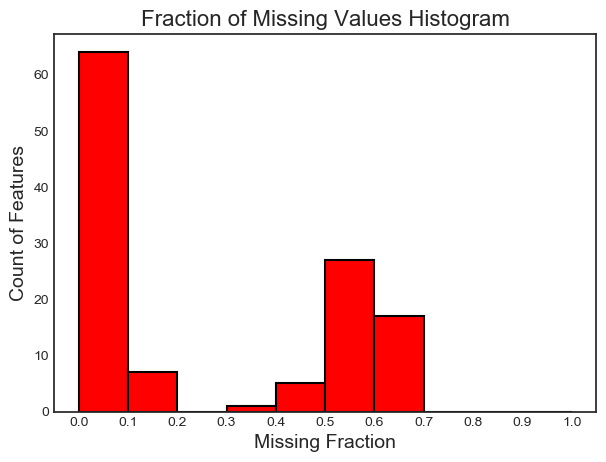

In [49]:
fs_credit.plot_missing()

In [51]:
fs_credit.identify_collinear(correlation_threshold=0.98)

21 features with a correlation magnitude greater than 0.98.



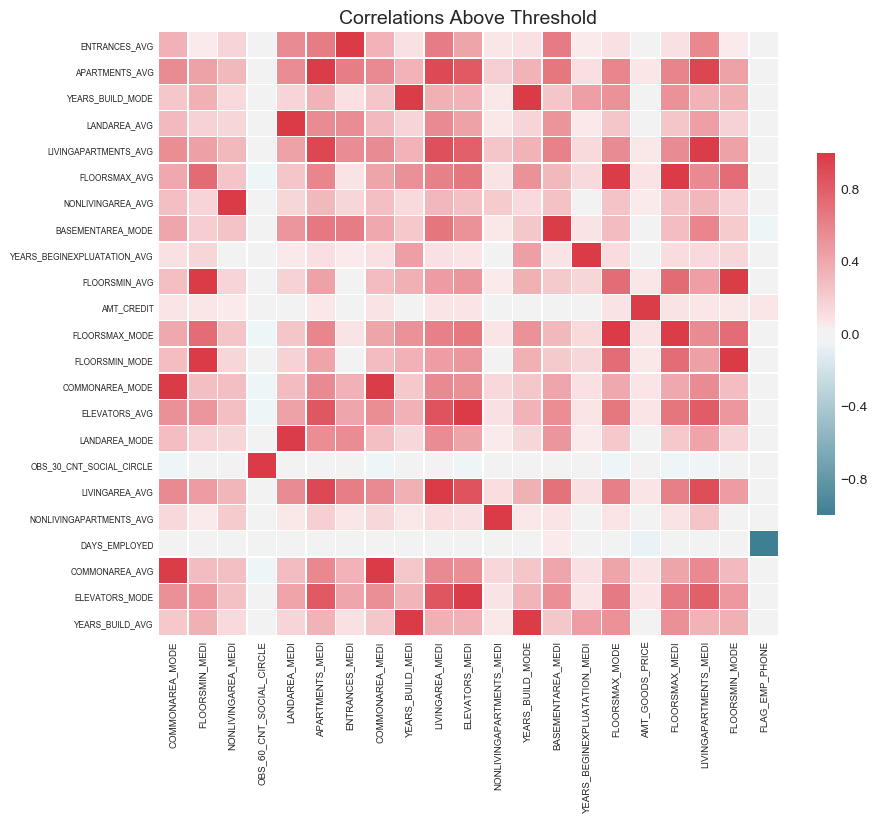

In [52]:
fs_credit.plot_collinear()

In [53]:
collinear_features=fs_credit.ops['collinear']
fs_credit.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,AMT_CREDIT,0.987232,AMT_GOODS_PRICE
1,DAYS_EMPLOYED,-0.999533,FLAG_EMP_PHONE
2,YEARS_BUILD_AVG,0.992120,YEARS_BUILD_MODE
3,COMMONAREA_AVG,0.988074,COMMONAREA_MODE
4,FLOORSMAX_AVG,0.984663,FLOORSMAX_MODE


In [54]:
fs_credit.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs_credit.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid_0's auc: 0.767603	valid_0's binary_logloss: 0.241979
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[16]	valid_0's auc: 0.789255	valid_0's binary_logloss: 0.272622
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[91]	valid_0's auc: 0.748754	valid_0's binary_logloss: 0.258043
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.717535	valid_0's binary_logloss: 0.27243
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[33]	valid_0's auc: 0.731815	valid_0's binary_logloss: 0.273153
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[57]	valid_0's auc: 0.712649	valid_0's binary_logloss: 0.25

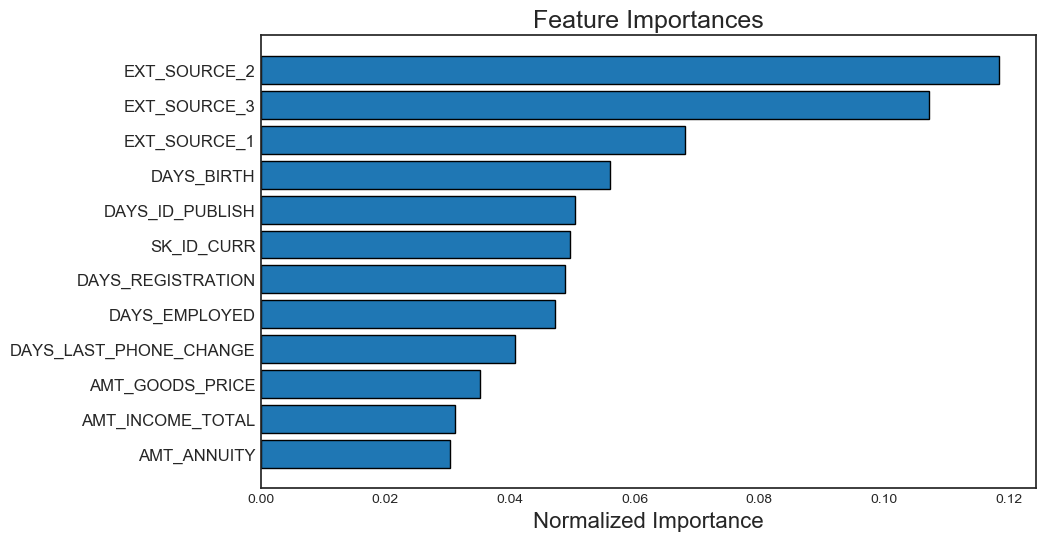

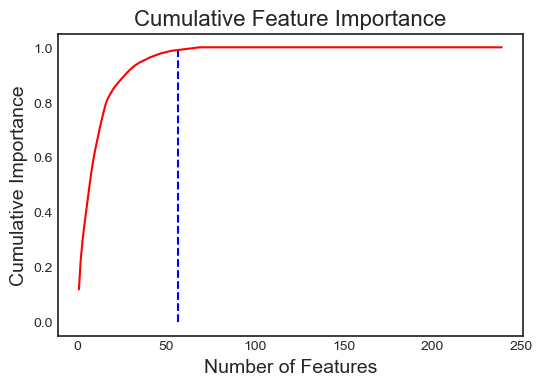

57 features required for 0.99 of cumulative importance


In [55]:
fs_credit.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [56]:
fs_credit.identify_low_importance(cumulative_importance = 0.99)

56 features required for cumulative importance of 0.99 after one hot encoding.
183 features do not contribute to cumulative importance of 0.99.



In [57]:
fs_credit.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,EXT_SOURCE_2,148.0,0.1184,0.1184
1,EXT_SOURCE_3,134.0,0.1072,0.2256
2,EXT_SOURCE_1,85.0,0.0680,0.2936
3,DAYS_BIRTH,70.0,0.0560,0.3496
4,DAYS_ID_PUBLISH,63.0,0.0504,0.4000
5,SK_ID_CURR,62.0,0.0496,0.4496
6,DAYS_REGISTRATION,61.0,0.0488,0.4984
7,DAYS_EMPLOYED,59.0,0.0472,0.5456
8,DAYS_LAST_PHONE_CHANGE,51.0,0.0408,0.5864
9,AMT_GOODS_PRICE,44.0,0.0352,0.6216


In [58]:
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l2: 1.23158e+10	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l2: 1.25603e+10	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l2: 1.21585e+10	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l2: 1.24828e+10	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l2: 1.21838e+10	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's l2: 1.21804e+10	valid_0's auc: 1
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is

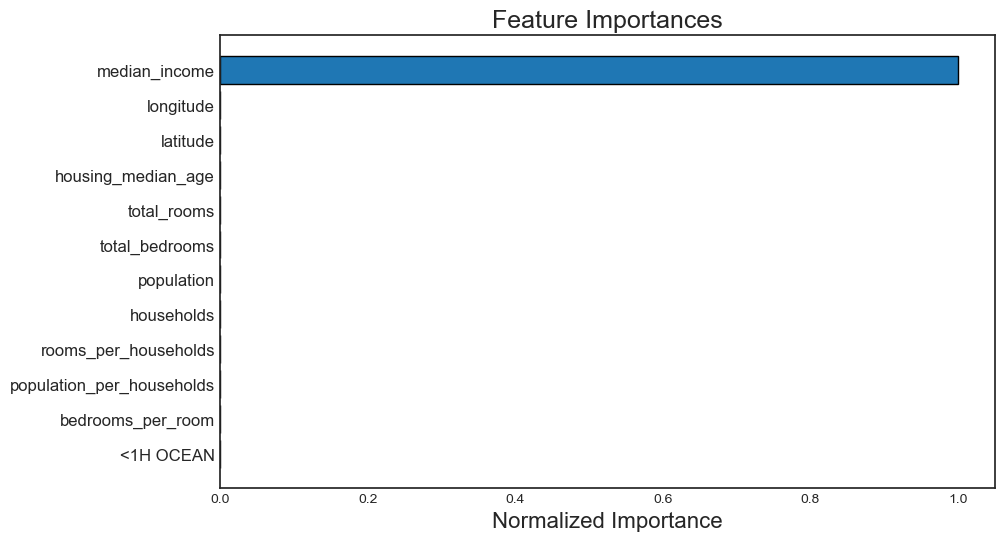

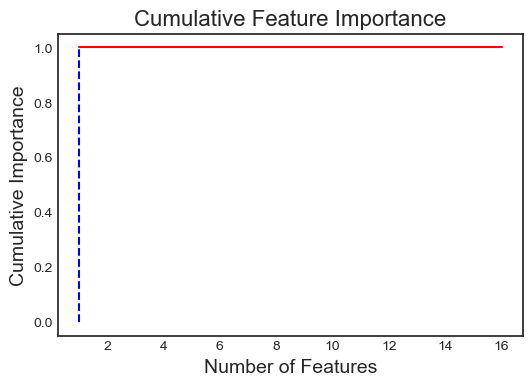

1 features required for 0.20 of cumulative importance


In [61]:
fs.plot_feature_importances(threshold=0.2,plot_n=12)

In [62]:
fs_credit.identify_single_unique()

4 features with a single unique value.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cdba5d0>,
      dtype=object)

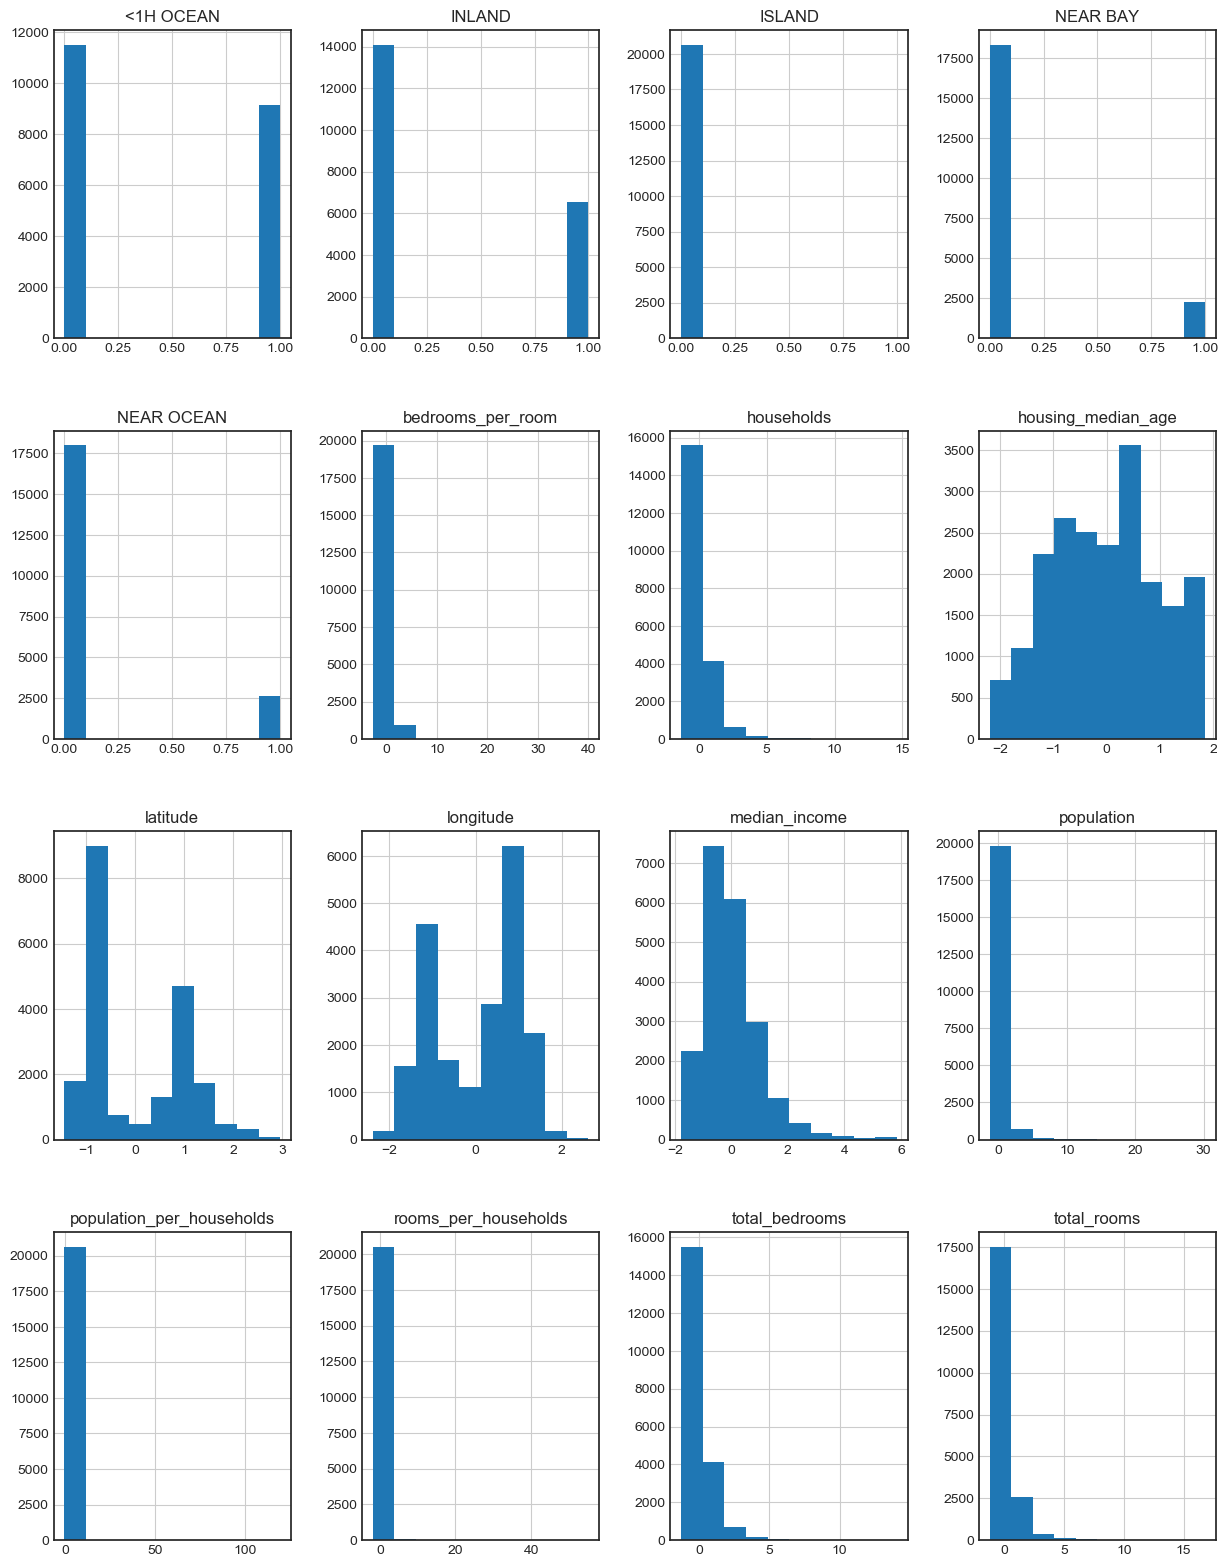

In [65]:
housing_features.hist(figsize=(15,20))

In [68]:
housing_features['INLAND'].value_counts()

0.0    14089
1.0     6551
Name: INLAND, dtype: int64

In [69]:
for index, sub_df in housing_features.groupby('INLAND'):
    print(index)
    print(sub_df.head())

0.0
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.804819       -0.972476   
1  -1.322844  1.043185           -0.607019     2.045890        1.357143   
2  -1.332827  1.038503            1.856182    -0.535746       -0.827024   
3  -1.337818  1.038503            1.856182    -0.624215       -0.719723   
4  -1.337818  1.038503            1.856182    -0.462404       -0.612423   

   population  households  median_income  rooms_per_households  \
0   -0.974429   -0.977033       2.344766              0.628559   
1    0.861439    1.669961       2.332238              0.327041   
2   -0.820777   -0.843637       1.782699              1.155620   
3   -0.766028   -0.733781       0.932968              0.156966   
4   -0.759847   -0.629157      -0.012881              0.344711   

   population_per_households  bedrooms_per_room  <1H OCEAN  INLAND  ISLAND  \
0                  -0.049597          -1.029988        0.0     0.0    

In [74]:
pd.crosstab(housing_features['INLAND'],housing_features['NEAR BAY'])

NEAR BAY,0.0,1.0
INLAND,,
0.0,11799,2290
1.0,6551,0


In [79]:
crossDf = pd.crosstab(housing_features['INLAND'],housing_features['NEAR BAY'])

In [80]:
import seaborn as sns

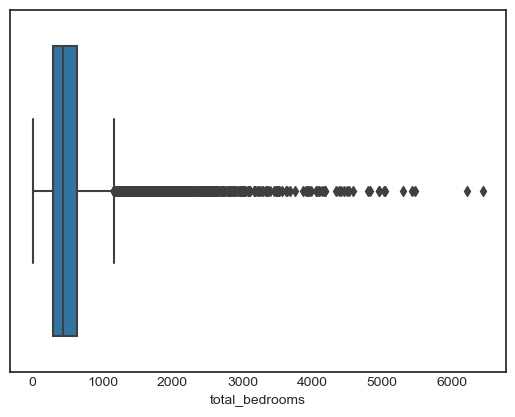

In [84]:
sns.boxplot(x='total_bedrooms',data=houses_df_num)

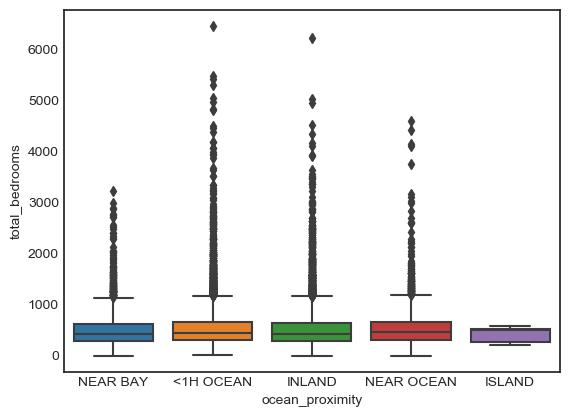

In [93]:
sns.boxplot(x='ocean_proximity',y='total_bedrooms',data=houses_df)

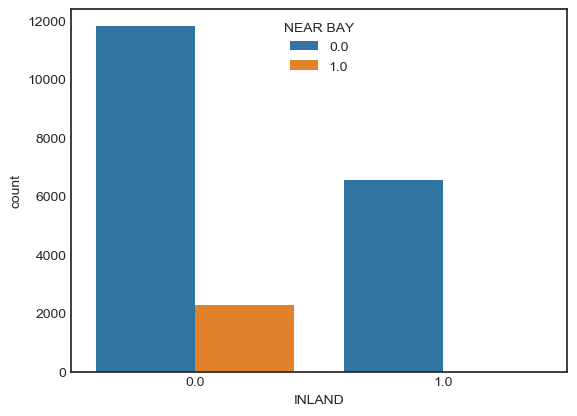

In [95]:
sns.countplot(x=housing_features['INLAND'],hue=housing_features['NEAR BAY'])